<a href="https://colab.research.google.com/github/nandeeshhu/DV_PROJECT_DA-591/blob/main/Data_Visualization_project_on_Business_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#E-commerce Business Insights and Visualization

**Group:** FOUR.

**Team Members:** Nandeesh H U (234161018), Prakhar Shankar (234161007), Bhushan Patil (234161015)


**OUTLINE:**
This notebook offers an in-depth analysis of sales data from an e-commerce business, comprising over half a million records across nine columns. It addresses various key questions about the business, including overall sales trends, best-selling products in different countries, monthly customer acquisition rates, and peak purchase times.

Utilizing Plotly Express for interactive graphs, Seaborn for heatmaps, and Matplotlib for figure formatting, the analysis provides comprehensive insights into the business's performance. The dataset used is a refined version of the original, with cleaning procedures involving data validation, removal of duplicates, and outlier management.

In summary, this notebook serves as a valuable resource for understanding the sales dynamics and strategic decision-making processes within the e-commerce domain.

##Importing Libraries and Data##

Data: Th csv file named "online_retail_cleaned.csv" included in the google drive:

Google drive link: https://drive.google.com/file/d/1tn8ud9VNBFdaWsMDeYWPPOhpO5ZdWRRe/view?usp=drive_link

In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import calendar
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")



The below function, configure_plotly_browser_state, is used to configure Plotly for browser-based visualization within a Jupyter Notebook environment. It imports the necessary module from IPython to display HTML content. Then, it injects a JavaScript script into the notebook's HTML output. This script configures Plotly by specifying the path to the Plotly library hosted on a CDN (Content Delivery Network), ensuring that Plotly plots are rendered correctly in the browser environment.

In [650]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.58.4.min.js?noext',
            },
          });
        </script>
        '''))


Please add the file path inside the function pd.read_csv()

In [651]:
data = pd.read_csv("/content/online_retail_cleaned.csv")

In [652]:
data.shape

(335910, 9)

In [653]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335910 entries, 0 to 335909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    335910 non-null  object 
 1   StockCode    335910 non-null  object 
 2   Description  335910 non-null  object 
 3   Quantity     335909 non-null  float64
 4   InvoiceDate  335909 non-null  object 
 5   UnitPrice    335909 non-null  float64
 6   CustomerID   251018 non-null  float64
 7   Country      335909 non-null  object 
 8   ItemTotal    335909 non-null  float64
dtypes: float64(4), object(5)
memory usage: 23.1+ MB


In [654]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [655]:
data.isna().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     84892
Country            1
ItemTotal          1
dtype: int64

In [656]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,15.30
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,15.30
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64.0,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,163.20
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32.0,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,81.60
5,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 10:51:00,2.55,17850.0,United Kingdom,15.30
6,536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4.0,2010-01-12 11:21:00,2.95,15862.0,United Kingdom,11.80
7,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8.0,2010-01-12 11:33:00,2.55,17850.0,United Kingdom,20.40
8,536502,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 12:36:00,2.95,16552.0,United Kingdom,17.70
9,536520,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3.0,2010-01-12 12:43:00,2.95,14729.0,United Kingdom,8.85


#Sales Analysis and Visualization

**Sales Insights for Each Country**

In [657]:
country_sales = pd.DataFrame(data.groupby("Country") \
["ItemTotal"].sum()).reset_index().rename({"ItemTotal":"TotalSales"},axis=1)

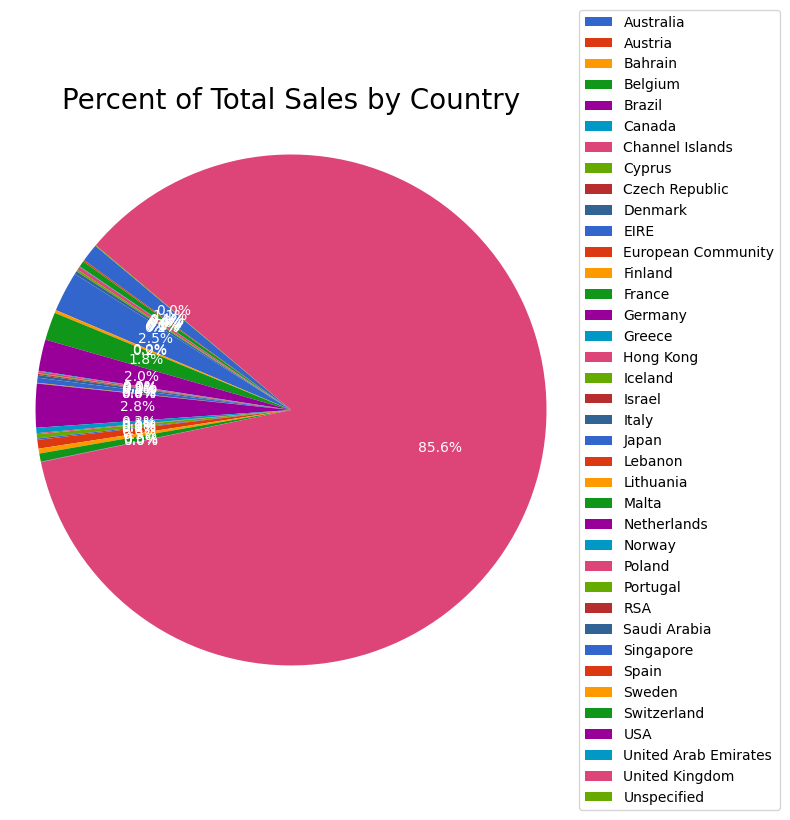

In [658]:
import matplotlib.pyplot as plt

filtered_country_sales = country_sales

labels = filtered_country_sales["Country"]
sizes = filtered_country_sales["TotalSales"]
colors = px.colors.qualitative.G10

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': 'white'})
plt.title("Percent of Total Sales by Country", fontsize=20)

plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

for text in texts:
    text.set_fontsize(10)
    text.set_color('white')

plt.axis('equal')
plt.tight_layout()
plt.show()


United Kingdom is the largest contributor to total sales, accounting for 85.6% of the total.
No other country contributes more than 5% of total sales.
Sales from 29 countries are listed on the pie chart. Unspecified countries account for neglegible no of total sales.

To visualize the distribution of total sales across countries excluding the UK, we'll create a map where each country's sales figure is represented. This will provide a clear picture of the relative contribution of each country to the total sales, excluding the UK, which has a predominant share.

This approach allows us to focus on the sales distribution among other countries without the UK's data skewing the scale. By plotting the sales figures on a map, we can easily identify the contribution of each country to the total sales.

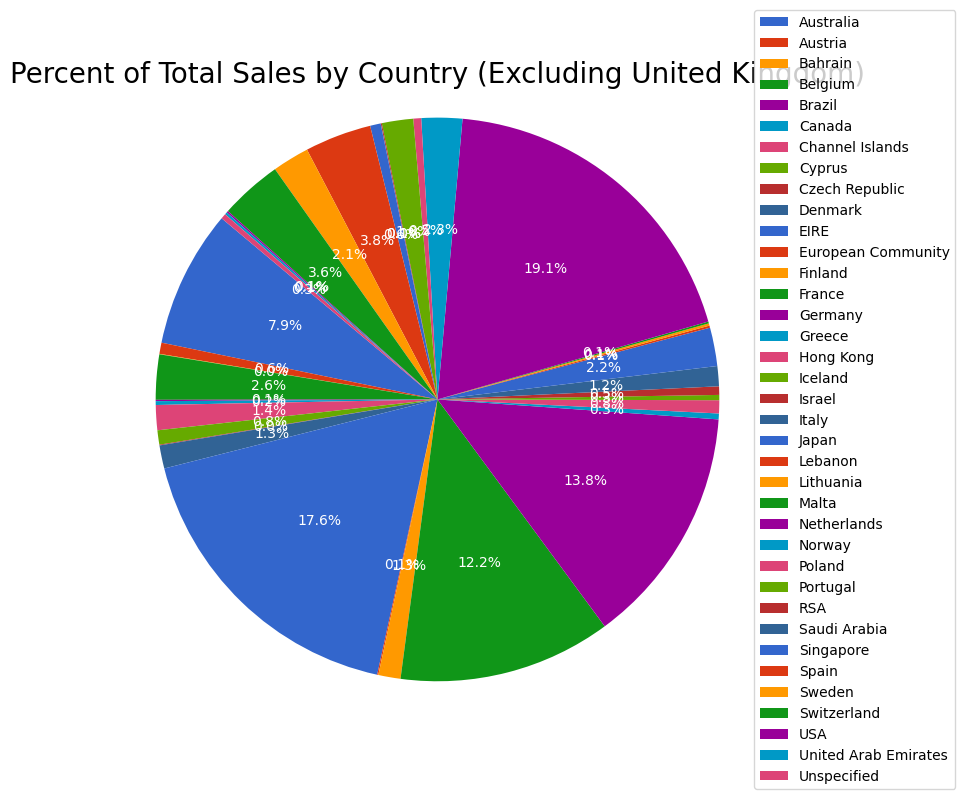

In [659]:
import matplotlib.pyplot as plt

filtered_country_sales = country_sales[country_sales["Country"] != "United Kingdom"]

labels = filtered_country_sales["Country"]
sizes = filtered_country_sales["TotalSales"]
colors = px.colors.qualitative.G10

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': 'white'})
plt.title("Percent of Total Sales by Country (Excluding United Kingdom)", fontsize=20)
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()


The pie chart shows the percent of total sales by country for a company, excluding the United Kingdom.

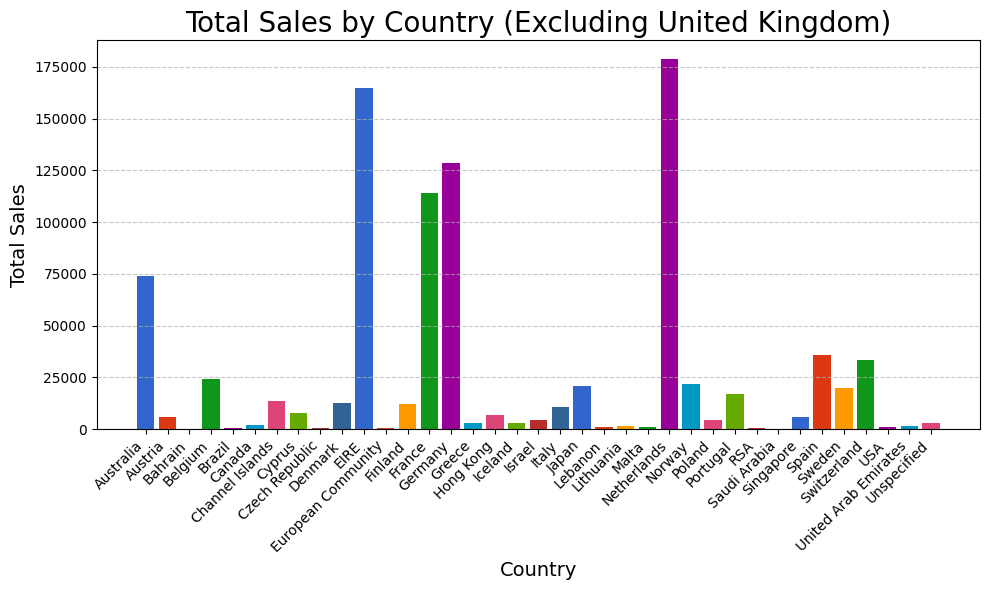

In [660]:
import matplotlib.pyplot as plt

filtered_country_sales = country_sales[country_sales["Country"] != "United Kingdom"]

labels = filtered_country_sales["Country"]
sizes = filtered_country_sales["TotalSales"]
colors = px.colors.qualitative.G10

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors)
plt.title("Total Sales by Country (Excluding United Kingdom)", fontsize=20)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The y-axis shows total sales.
The x-axis shows the countries. There are many countries listed, but some labels are cut off.
It appears that Germany is the country with the highest total sales, followed by the United States (USA) and then Japan. However, it is difficult to be certain because the scale is not labeled.
The total sales for many countries appear to be relatively low.

In [661]:
filtered_country_sales = country_sales[country_sales["Country"] \
.isin(["Unspecified", "European Community","United Kingdom"]) == False]

In [662]:

filtered_country_sales["Country"] = \
filtered_country_sales["Country"].replace({"EIRE": "Ireland",
                                  "Channel Islands": "United Kingdom",
                                  "RSA": "South Africa"})

Please note that the map presented below offers interactivity, allowing you to zoom in and out effortlessly. Additionally, you can hover over different countries to reveal their respective sales figures.

In [663]:
choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = country_sales["Country"],
                  locationmode = "country names",
                  z = country_sales["TotalSales"].astype(float).round(0).tolist(),
                  hovertext = country_sales["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  colorbar = {"title" : "Total Sales", },
                )
layout = dict(
              title = "Total Sales By Country",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}
             )



configure_plotly_browser_state()
fig = go.Figure(data=choro_data, layout=layout)
iplot(fig)

The choropleth map provides a visual representation of total sales by country, offering several insights:

Sales Distribution: The map highlights the distribution of sales across various countries, with darker shades indicating higher sales volumes and lighter shades representing lower sales.

Key Contributors: Countries with darker shades on the map are key contributors to total sales. These nations play a significant role in generating revenue for the business.

Regional Disparities: Disparities in sales between different regions or countries are evident from the varying color intensities on the map. This insight can help identify regions where sales efforts may need to be intensified or optimized.

Geographic Trends: Geographical patterns in sales distribution may emerge from the map. For example, certain regions or continents may consistently exhibit higher sales figures compared to others, indicating market preferences or economic factors at play.

Potential Opportunities: Areas with lighter shades may represent untapped or underexplored markets. Identifying these regions can guide strategic decision-making, such as market expansion efforts or targeted marketing campaigns to capitalize on potential opportunities.

Comparative Analysis: The map allows for easy comparison between different countries' sales performance. By visually assessing the color intensities, stakeholders can quickly identify which countries contribute the most to total sales and how they compare relative to one another.

In [664]:
choro_data = dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = country_sales["Country"],
                  locationmode = "country names",
                  z = filtered_country_sales["TotalSales"].astype(float).round(0).tolist(),
                  hovertext = country_sales["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  colorbar = {"title" : "Total Sales", },
                )

layout = dict(
              title = "Total Sales By Country Excluding the UK",
              titlefont = dict(size = 20),
              geo = dict(showframe = False, bgcolor = "#BAEAED",),
              margin={"r":0,"t":50,"l":10,"b":0}
             )
configure_plotly_browser_state()
fig = go.Figure(data=choro_data, layout=layout)
fig.update_traces(visible = True)
iplot(fig)

In [665]:
choro_data = [dict(
                  type = "choropleth",
                  colorscale = "Agsunset",
                  locations = country_sales["Country"],
                  locationmode = "country names",
                  z = country_sales["TotalSales"].astype(float).round(0).tolist(),
                  hovertext = country_sales["Country"],
                  hovertemplate = "%{hovertext}: £%{z:,.0f} <extra></extra>",
                  colorbar = {"title" : "Total Sales", },
                 ),
              dict(
                  type = "scattergeo",
                  locations = country_sales["Country"],
                  locationmode = "country names",
                  text = country_sales["Country"],
                  hoverinfo = "skip",
                  mode = "text",
                  textfont=dict(
                                size = 11,
                                color = "white",
                                family = "Arial"
                               )
                  )
            ]
layout = dict(
              title = "Total Sales By Country Excluding the UK",
              titlefont = dict(size = 20),
              geo = dict(
                         showframe = False,
                         bgcolor = "#A4E0E4",
                         projection = dict(scale = 4.5),
                         center = dict(lat = 47, lon = 5)
                         ),
              margin={"r":0,"t":50,"l":10,"b":0}
             )
configure_plotly_browser_state()
fig = go.Figure(data = choro_data, layout = layout)
iplot(fig)

The visualization presents a choropleth map showing the distribution of total sales across different countries, excluding the UK. Each country is represented by a shaded region, with the color intensity indicating the corresponding total sales figure. Darker shades signify higher sales values, while lighter shades represent lower sales.

Additionally, the map includes country labels for reference, displayed using the scattergeo trace. However, these labels do not appear when hovering over the map to avoid clutter and ensure a cleaner visualization.

Overall, this visualization offers a clear overview of how total sales are distributed among various countries, enabling easy comparison and identification of key contributors to sales outside the UK.

#Overall Sales Trend

In [666]:
print("first date: ", data["InvoiceDate"].min(),"\n", "last date: ", data["InvoiceDate"].max())

first date:  2010-01-12 08:26:00 
 last date:  2011-12-10 17:19:00


In [667]:
data["year"], data["month"] = data["InvoiceDate"].dt.year, data["InvoiceDate"].dt.month

In [668]:
sales = data.groupby(["year","month"])["ItemTotal"].sum() \
.reset_index().rename({"ItemTotal":"TotalSales"},axis=1)

sales

,year,month,TotalSales
0,2010.0,1.0,58548.56
1,2010.0,2.0,42424.69
2,2010.0,3.0,40997.80
3,2010.0,5.0,27160.20
4,2010.0,6.0,48520.02
5,2010.0,7.0,68094.54
6,2010.0,8.0,36590.62
7,2010.0,9.0,44044.92
8,2010.0,10.0,49326.16
9,2010.0,12.0,257115.14


In [669]:
sales["year"] = sales['year'].astype(int)

In [670]:
new_rows = pd.DataFrame({"year":[2010,2010],
                         "month": [4,11],
                         "TotalSales": [38123.21,184980.04]},
                         index = [98,99])

sales = pd.concat([new_rows, sales]) \
.sort_values(by=["year","month"]).reset_index(drop=True)

In [671]:
sales["month"] = sales["month"].apply(lambda x: calendar.month_abbr[int(x)])

sales["month"] = sales["month"].astype(str) + " " + sales["year"].astype(str)

sales = sales.drop("year", axis = 1)

sales = sales[0:23]

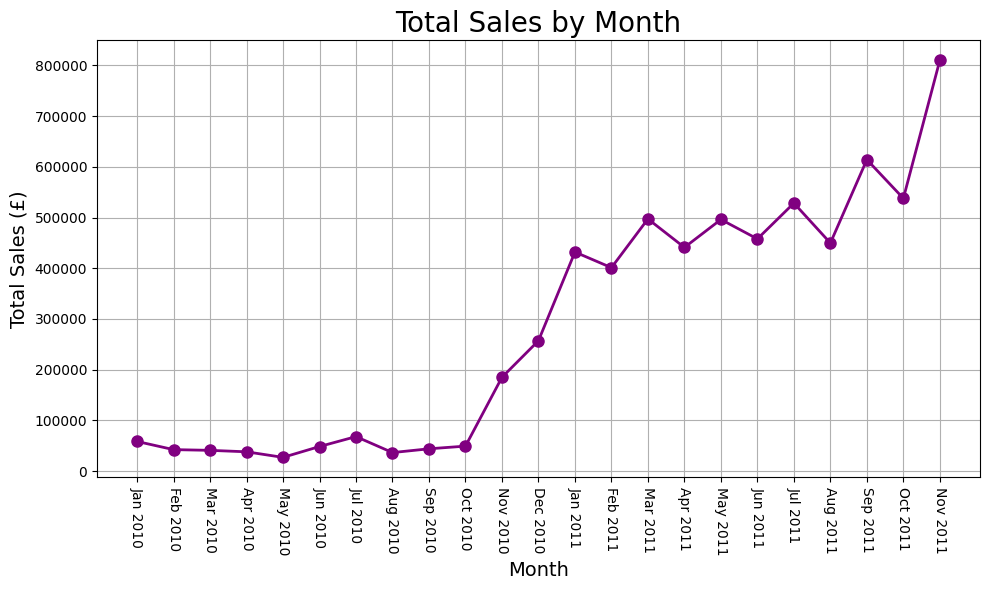

In [672]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sales["month"], sales["TotalSales"], marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
plt.title("Total Sales by Month", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales (£)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=270)

plt.tight_layout()
plt.show()


The x-axis shows month, ranging from January 2010 to November 2011. The y-axis shows total sales in pounds (£). There are grid lines on the chart to help estimate the value.

Here are some observations about the plot:

Total sales appear to have decreased over time. Sales were highest in November 2010 at around £800,000 and then steadily decreased to around £100,000 in November 2011.
It is difficult to say for certain why total sales decreased over time. There could be a number of reasons, such as seasonality, economic factors, or changes in marketing strategies.

In [673]:
len(data["InvoiceNo"].unique())

21492

**Visualizing the missing values in the Data**

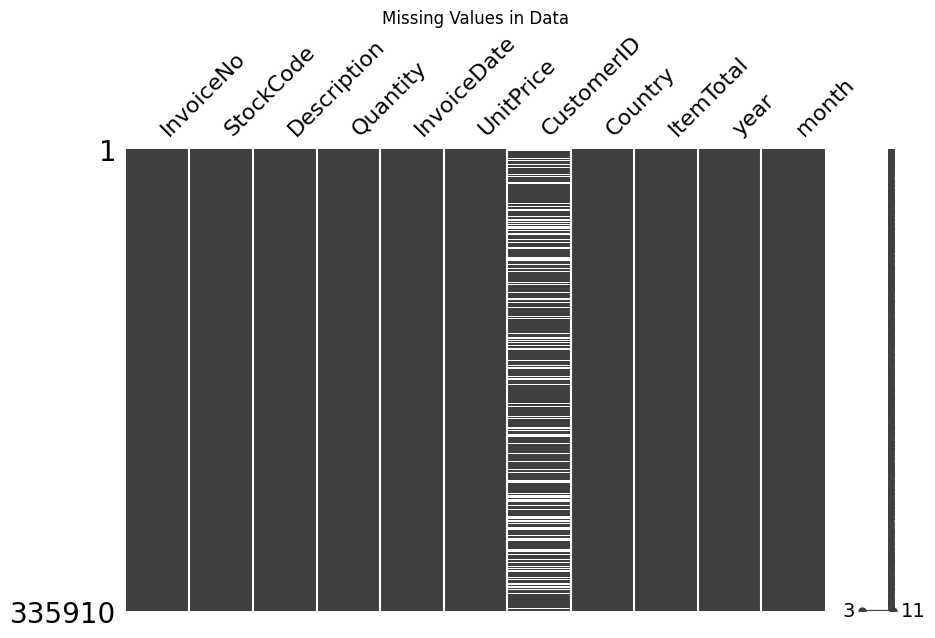

In [674]:
import missingno as msno

msno.matrix(data, figsize=(10, 6))
plt.title("Missing Values in Data")
plt.show()




There are missing values in several columns, including InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Item Total, year, and month.
It is not possible to tell from this table how many rows or columns contain missing data.
We don't know why the data is missing. There could be a number of reasons, such as data entry errors, equipment failures, or participants who refused to answer questions.

invoices having all of their CustomerIDs missing

In [675]:
len(data[data["CustomerID"].isna()]["InvoiceNo"].unique())

1359

In [676]:
data.groupby("InvoiceNo").apply(lambda x: all(np.isnan(i) for i in x["CustomerID"])).tolist().count(True)

1358

Since all invoices have the same number, it implies that either all CustomerIDs are missing for those invoices, or none of the CustomerIDs are missing.

Given this, we'll exclude records with missing CustomerIDs from our analysis, as we don't have information on how many customers are associated with those NaN values.

In [677]:
customers = data[data["CustomerID"].notna()].groupby(["year", "month"]) \
.agg({"CustomerID": "unique"}) \
.reset_index().rename({"CustomerID": "unique_customer_ids"}, axis = 1)

customers.insert(2,"unique_customers_this_month", customers["unique_customer_ids"].str.len())

customers.head()

,year,month,unique_customers_this_month,unique_customer_ids
0,2010.0,1.0,98,"[17850.0, 17511.0, 13408.0, 15862.0, 16552.0, ..."
1,2010.0,2.0,113,"[17850.0, 17732.0, 17976.0, 17685.0, 15640.0, ..."
2,2010.0,3.0,53,"[16883.0, 12841.0, 17967.0, 14723.0, 17198.0, ..."
3,2010.0,5.0,76,"[18055.0, 18109.0, 15708.0, 16931.0, 16814.0, ..."
4,2010.0,6.0,87,"[18219.0, 14748.0, 15860.0, 14344.0, 16719.0, ..."


To identify new customers, we can create a running list of all unique CustomerIDs up to each month. By removing duplicates and counting the length of the list for each month, we can determine the number of new customers added in that month. This approach gives us a running total of unique customers over time.

In [678]:
ids = []

for index, row in customers.iterrows():
    if index == 0:
        ids.append(row["unique_customer_ids"].tolist())

    else:
        ids.append(row["unique_customer_ids"].tolist() + ids[index-1])

In [679]:
total_customers = []
for i in range(len(ids)):
    total_customers.append(len(set(ids[i])))
customers.insert(3, "total_customers", total_customers)

In [680]:
customers.insert(3, "new_customers_this_month", customers["total_customers"].diff() \
.replace({np.nan: 98}).astype(int))


In [681]:
customers = customers.drop("unique_customer_ids", axis = 1)

In [682]:
new_rows = \
pd.DataFrame({"year":[2010,2010],
              "month": [4,11],
              "unique_customers_this_month": [65,271],
              "new_customers_this_month": [59,163],
              "total_customers": [288,803]}, index = [98,99])

customers = pd.concat([new_rows, customers]) \
.sort_values(by=["year","month"]).reset_index(drop=True)

In [683]:
customers["month"] = customers["month"].apply(lambda x: calendar.month_abbr[int(x)])

customers["month"] = customers["month"].astype(str) + " " + customers["year"].astype(str)

customers = customers.drop("year", axis = 1)

customers = customers[0:23]

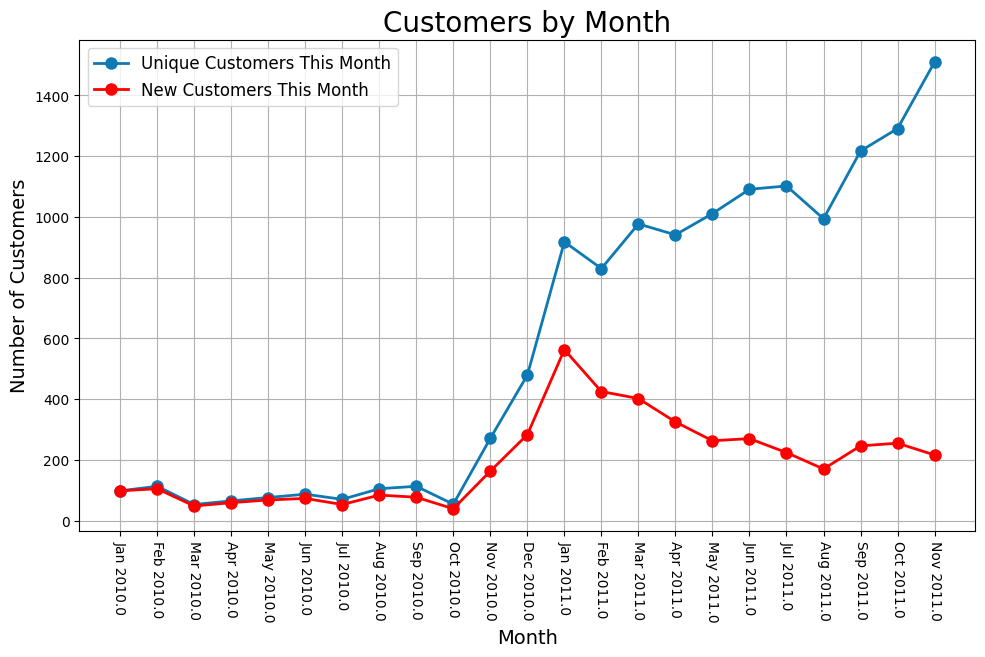

In [684]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(customers["month"], customers["unique_customers_this_month"], marker='o', color='#0E79B2', linestyle='-', linewidth=2, markersize=8, label='Unique Customers This Month')
plt.plot(customers["month"], customers["new_customers_this_month"], marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label='New Customers This Month')
plt.title("Customers by Month", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=270)
plt.show()


After analyzing the data, we observe a notable increase in new customers around December 2010 and January 2011, likely due to the Christmas holidays. This could be attributed to marketing campaigns or seasonal promotions during that period. Following this spike, the number of customers per month shows a steady increase, indicating sustained growth in customer base.

Another noteworthy observation is the surge in customers in November 2011, despite no significant increase in new customers during that time. This pattern suggests that customers who made purchases during the Christmas season in 2010 were satisfied and returned for their 2011 holiday shopping, contributing to the overall customer growth.

However, it's worth noting that the number of new customers has been gradually decreasing over time. This decline could be indicative of various factors, including changes in marketing strategies or shifts in customer behavior. Further investigation into marketing campaigns and customer retention efforts may provide valuable insights into this trend.


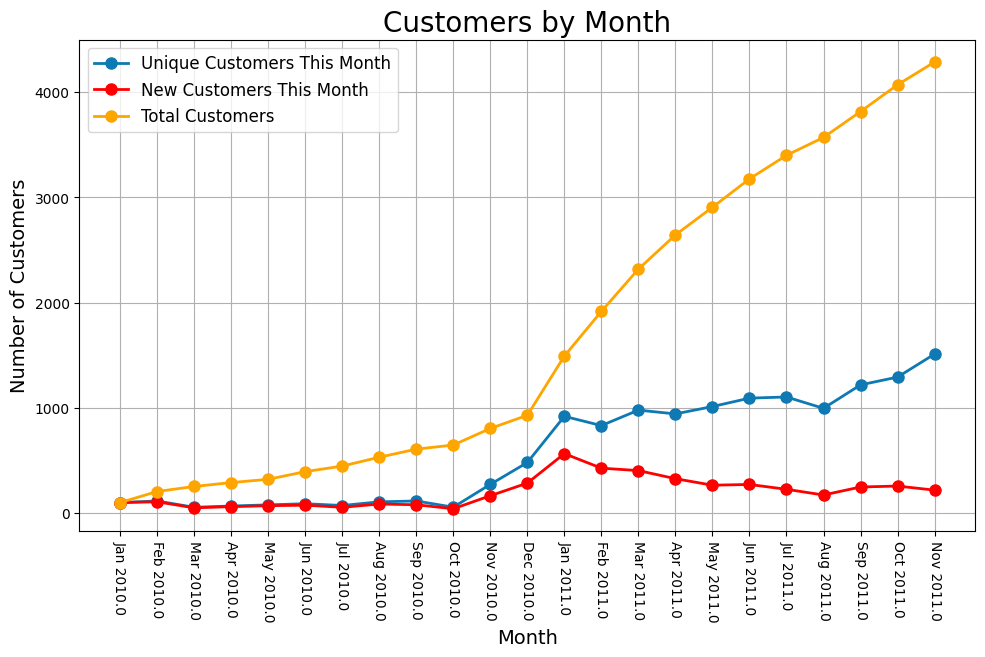

In [685]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(customers["month"], customers["unique_customers_this_month"], marker='o', color='#0E79B2', linestyle='-', linewidth=2, markersize=8, label='Unique Customers This Month')
plt.plot(customers["month"], customers["new_customers_this_month"], marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label='New Customers This Month')
plt.plot(customers["month"], customers["total_customers"], marker='o', color='orange', linestyle='-', linewidth=2, markersize=8, label='Total Customers')
plt.title("Customers by Month", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=270)
plt.show()


Customer Segmentation: The graph showcases three distinct lines, each representing a different customer segment:

Blue line: This line depicts the trend in unique customers, representing the total number of individual customers who have made a purchase during the specified timeframe.
Red line: This line signifies new customers, indicating the number of first-time buyers each month.
Yellow line: This line represents the total customers (unique + new).
Customer Acquisition Trends: By analyzing the red line (new customers), we can observe the company's customer acquisition strategy. There might be a seasonal pattern, with a peak in new customers in December of both years. This could be attributed to holiday promotions or increased marketing efforts during these peak shopping seasons.  However, it's important to consider the y-axis scale to determine the significance of these fluctuations.

Customer Retention Trends: The blue line (unique customers) offers valuable insights into customer retention. Generally, a blue line consistently above the red line suggests the business is retaining a larger portion of its existing customer base compared to acquiring new ones. This could indicate successful customer service initiatives or loyalty programs that encourage repeat purchases.

Overall Customer Growth:  We can assess the overall customer growth of the business by looking at the yellow line (total customers). Ideally, this line should show an upward trend, suggesting a growing customer base. If the yellow line is consistently increasing, it's a positive sign, indicating the company is attracting new customers while retaining existing ones.

#Season during where Customers Make the Most Purchases#

To identify the optimal time of day for targeting marketing campaigns, we analyze the purchasing patterns during peak holiday seasons. Specifically, we examine the time of day when customers made the most purchases in December 2010, as well as the most common purchasing hours in October, November, and the available days of December 2011.

By comparing these timeframes, we can pinpoint the recurring patterns and determine the hours when customers are most active in making purchases. This insight will help in strategizing marketing campaigns to maximize engagement and sales during the upcoming holiday season.

In [686]:
subset = data[
              ((data["year"] == 2010) & (data["month"] == 12))
              |
              ((data["year"] == 2011) & (data["month"] == 10))
              |
              ((data["year"] == 2011) & (data["month"] == 11))
              |
              ((data["year"] == 2011) & (data["month"] == 12))
              ]

In [687]:
subset["hour"] = subset["InvoiceDate"].astype(str).str[11:13].astype(int)

In [688]:
frequency = subset.groupby(["year","month","hour"]) \
.agg({"InvoiceNo":"nunique"}).reset_index() \
.rename({"InvoiceNo": "num_orders"}, axis = 1)

frequency.head()

,year,month,hour,num_orders
0,2010.0,12.0,8,7
1,2010.0,12.0,9,49
2,2010.0,12.0,10,79
3,2010.0,12.0,11,118
4,2010.0,12.0,12,101


In [689]:
pivot = frequency.pivot(index = "hour", columns = ["year","month"], values = ["num_orders"])

pivot = pd.DataFrame(pivot.to_records())

pivot["hour"] = pivot["hour"].astype(str) + ":00"

pivot = pivot.set_index("hour")

pivot.index.name = ""

pivot.rename(columns={
                      pivot.columns[0]:"Dec 2010",
                      pivot.columns[1]:"Oct 2011",
                      pivot.columns[2]:"Nov 2011",
                      pivot.columns[3]:"Dec 2011"
                      }, inplace = True)

pivot

,Dec 2010,Oct 2011,Nov 2011,Dec 2011
,,,,
7:00,NaN,3.0,2.0,NaN
8:00,7.0,48.0,104.0,9.0
9:00,49.0,108.0,175.0,50.0
10:00,79.0,226.0,273.0,58.0
11:00,118.0,224.0,313.0,65.0
12:00,101.0,339.0,398.0,89.0
13:00,105.0,283.0,372.0,70.0
14:00,90.0,263.0,307.0,56.0
15:00,110.0,228.0,285.0,55.0


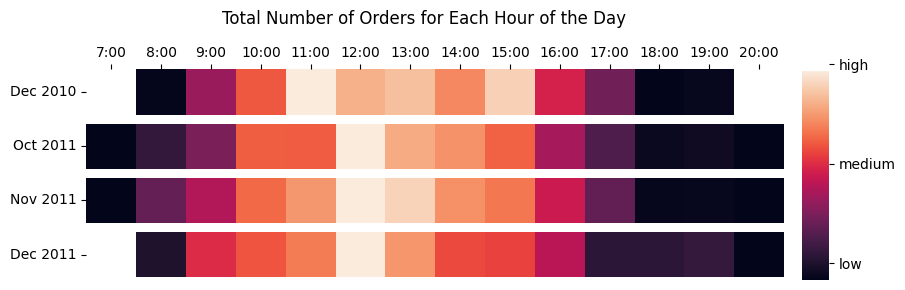

In [690]:
fig, axs = plt.subplots(4,1, figsize = (9,2.7))
cbar_ax = fig.add_axes([0.92, .10, .03, .8])

sns.heatmap(pd.DataFrame(pivot["Dec 2010"]).T, ax = axs[0], cbar = False)
sns.heatmap(pd.DataFrame(pivot["Oct 2011"]).T, ax = axs[1], cbar_ax = cbar_ax, xticklabels=False)
sns.heatmap(pd.DataFrame(pivot["Nov 2011"]).T, ax = axs[2], cbar = False, xticklabels=False)
sns.heatmap(pd.DataFrame(pivot["Dec 2011"]).T, ax = axs[3], cbar = False, xticklabels=False)

cbar = axs[1].collections[0].colorbar
cbar.set_ticks([30, 190, 350])
cbar.set_ticklabels(["low", "medium", "high"])

axs[0].xaxis.set_ticks_position("top")
axs[0].yaxis.set_ticklabels(axs[0].get_yticklabels(), rotation = 0)
axs[1].yaxis.set_ticklabels(axs[1].get_yticklabels(), rotation = 0)
axs[2].yaxis.set_ticklabels(axs[2].get_yticklabels(), rotation = 0)
axs[3].yaxis.set_ticklabels(axs[3].get_yticklabels(), rotation = 0)

fig.suptitle("Total Number of Orders for Each Hour of the Day", y = 1.10)
plt.show()

The x-axis shows the hour of the day, ranging from 7:00 AM to 8:00 PM. It appears that some hours are missing labels, specifically between 4:00 PM and 7:00 PM.
The y-axis shows the total number of orders.
There appear to be two peaks in the number of orders. The first peak occurs around 11:00 AM and the second peak occurs around 2:00 PM. It is difficult to say for certain what causes these peaks without additional information.

The text at the top of the graph indicates that the data is for December 2010.
There are three color-coded sections along the x-axis, labeled "low," "medium," and "high." However, it is not clear what these colors correspond to in terms of the number of orders.




In [691]:
pivot.replace(np.nan,0).style\
.background_gradient(cmap="rocket", subset=["Dec 2010"])\
.background_gradient(cmap="rocket", subset=["Oct 2011"])\
.background_gradient(cmap="rocket", subset=["Nov 2011"])\
.background_gradient(cmap="rocket", subset=["Dec 2011"])\
.format("{:.0f}")

,Dec 2010,Oct 2011,Nov 2011,Dec 2011
,,,,
7:00,0,3,2,0
8:00,7,48,104,9
9:00,49,108,175,50
10:00,79,226,273,58
11:00,118,224,313,65
12:00,101,339,398,89
13:00,105,283,372,70
14:00,90,263,307,56
15:00,110,228,285,55


The x-axis shows the month, ranging from December 2019 to November 2020.
The y-axis shows the total sales in dollars ($).

There appears to be a seasonal trend in sales, with a peak in December 2019 (around 800,000) and a low point in July 2020 (around $200,000). This could be due to factors such as holidays, weather patterns, or back-to-school sales.

Overall, sales appear to have increased over the past year.

Indeed, the data shows a consistent trend of peak order placements around midday, particularly at 12:00. This suggests that targeting marketing campaigns during this timeframe could yield optimal results in terms of customer engagement and conversions. By aligning promotional activities with the times when customers are most active, the marketing team can effectively capitalize on these peak periods to drive sales and enhance overall business performance.

In [692]:
sales_countr_descr = data.groupby(["Country", "Description"]) \
.agg({"ItemTotal": "sum"}) \
.rename({"ItemTotal":"TotalSales"},axis=1).reset_index()

sales_countr_descr

,Country,Description,TotalSales
0,Australia,10 COLOUR SPACEBOY PEN,40.80
1,Australia,12 PENCIL SMALL TUBE WOODLAND,211.20
2,Australia,20 DOLLY PEGS RETROSPOT,30.00
3,Australia,3 HOOK HANGER MAGIC GARDEN,23.40
4,Australia,3 STRIPEY MICE FELTCRAFT,330.00
...,...,...,...
10007,Unspecified,WOODEN HAPPY BIRTHDAY GARLAND,20.65
10008,Unspecified,WOODEN PICTURE FRAME WHITE FINISH,15.30
10009,Unspecified,WOODEN UNION JACK BUNTING,5.95
10010,Unspecified,WORLD WAR 2 GLIDERS ASSTD DESIGNS,27.84


In [693]:
max_sales = pd.DataFrame(sales_countr_descr.groupby("Country") \
["TotalSales"].max().reset_index()) \
.rename({"TotalSales":"Best_Product_Total_Sales"},axis=1)

max_sales.head()

,Country,Best_Product_Total_Sales
0,Australia,1987.2
1,Austria,302.4
2,Bahrain,59.7
3,Belgium,1181.4
4,Brazil,175.2


In [694]:
joined_df = sales_countr_descr.merge(max_sales, on = "Country", how = "left")
joined_df

,Country,Description,TotalSales,Best_Product_Total_Sales
0,Australia,10 COLOUR SPACEBOY PEN,40.80,1987.2
1,Australia,12 PENCIL SMALL TUBE WOODLAND,211.20,1987.2
2,Australia,20 DOLLY PEGS RETROSPOT,30.00,1987.2
3,Australia,3 HOOK HANGER MAGIC GARDEN,23.40,1987.2
4,Australia,3 STRIPEY MICE FELTCRAFT,330.00,1987.2
...,...,...,...,...
10007,Unspecified,WOODEN HAPPY BIRTHDAY GARLAND,20.65,70.5
10008,Unspecified,WOODEN PICTURE FRAME WHITE FINISH,15.30,70.5
10009,Unspecified,WOODEN UNION JACK BUNTING,5.95,70.5
10010,Unspecified,WORLD WAR 2 GLIDERS ASSTD DESIGNS,27.84,70.5


In [695]:
joined_df = joined_df[joined_df["TotalSales"] == joined_df["Best_Product_Total_Sales"]]
joined_df.head()

,Country,Description,TotalSales,Best_Product_Total_Sales
230,Australia,RED TOADSTOOL LED NIGHT LIGHT,1987.2,1987.2
420,Austria,PACK OF 6 PANNETONE GIFT BOXES,302.4,302.4
421,Austria,PACK OF 6 SWEETIE GIFT BOXES,302.4,302.4
502,Bahrain,NOVELTY BISCUITS CAKE STAND 3 TIER,59.7,59.7
834,Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,1181.4,1181.4


To find the percentage of total sales generated by each product in each country, we first need to calculate the total sales for each country. Then, we can join this information with the table containing product sales data. The resulting table will show the percentage of total sales that each product contributes to the overall sales in each country. This analysis will provide valuable insights into the sales distribution of products across different regions.

In [696]:
joined_df = joined_df.drop("Best_Product_Total_Sales", axis = 1)

In [697]:
country_sales = pd.DataFrame(data.groupby("Country")["ItemTotal"].sum()) \
.reset_index().rename({"ItemTotal":"Country_Total_Sales"}, axis = 1)

country_sales.head()

,Country,Country_Total_Sales
0,Australia,73744.07
1,Austria,6005.97
2,Bahrain,234.90
3,Belgium,24169.44
4,Brazil,705.06


In [698]:
joined_df = joined_df.merge(country_sales, on = "Country", how = "inner") \
.rename({"Description":"Best_Selling_Product"}, axis = 1)

joined_df.head()

,Country,Best_Selling_Product,TotalSales,Country_Total_Sales
0,Australia,RED TOADSTOOL LED NIGHT LIGHT,1987.2,73744.07
1,Austria,PACK OF 6 PANNETONE GIFT BOXES,302.4,6005.97
2,Austria,PACK OF 6 SWEETIE GIFT BOXES,302.4,6005.97
3,Bahrain,NOVELTY BISCUITS CAKE STAND 3 TIER,59.7,234.90
4,Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,1181.4,24169.44


We'll create an additional column that calculates the percentage of total sales generated by the best-selling item in each country. This column will be formatted as a percentage with two decimal points. We'll then apply a background gradient to enhance the visualization of this information.

In [699]:
joined_df["%_of_Country_Sales"] = (joined_df["TotalSales"] / joined_df["Country_Total_Sales"])

joined_df \
.style.background_gradient(cmap=sns.light_palette("seagreen", as_cmap=True), \
 subset=["%_of_Country_Sales"]) \
.format({"%_of_Country_Sales":"{:.2%}",
         "TotalSales":"£{:,.0f}",
         "Country_Total_Sales":"£{:,.0f}"})

,Country,Best_Selling_Product,TotalSales,Country_Total_Sales,%_of_Country_Sales
0,Australia,RED TOADSTOOL LED NIGHT LIGHT,"£1,987","£73,744",2.69%
1,Austria,PACK OF 6 PANNETONE GIFT BOXES,£302,"£6,006",5.03%
2,Austria,PACK OF 6 SWEETIE GIFT BOXES,£302,"£6,006",5.03%
3,Bahrain,NOVELTY BISCUITS CAKE STAND 3 TIER,£60,£235,25.42%
4,Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,"£1,181","£24,169",4.89%
5,Brazil,REGENCY CAKESTAND 3 TIER,£175,£705,24.85%
6,Canada,RETRO COFFEE MUGS ASSORTED,£534,"£2,043",26.15%
7,Channel Islands,REGENCY CAKESTAND 3 TIER,£518,"£13,410",3.86%
8,Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,£580,"£7,666",7.57%
9,Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,£71,£386,18.34%


The plot uses a color gradient ranging from light to dark shades of green. Lighter shades represent lower percentages of country sales contribution, while darker shades indicate higher percentages.

#Product having the most common best seller

In [700]:
pd.DataFrame(joined_df["Best_Selling_Product"].value_counts()) \
.rename({"Best_Selling_Product":"Best_Selling_Product_in_X_Countries"},axis=1)

,Best_Selling_Product_in_X_Countries
REGENCY CAKESTAND 3 TIER,10
ROUND SNACK BOXES SET OF4 WOODLAND,4
PINK 3 PIECE POLKADOT CUTLERY SET,3
RETROSPOT TEA SET CERAMIC 11 PC,2
RED TOADSTOOL LED NIGHT LIGHT,1
GRAND CHOCOLATECANDLE,1
DOTCOM,1
MINI PAINT SET VINTAGE,1
DOORMAT UNION FLAG,1
PLASTERS IN TIN STRONGMAN,1


We can determine the most successful products overall by examining their sales volume and average unit price. Products with relatively high quantities sold at relatively high prices are considered successful. This relationship can be visualized using a scatter plot, where the total quantity sold is plotted on the x-axis and the average unit price is plotted on the y-axis. Products with markers located in the north-east quadrant of the scatter plot indicate high quantities sold at high prices, indicating their success.

In [701]:
products = data.groupby("Description") \
.agg({"Quantity":"sum", "UnitPrice":"mean"}).reset_index()

products = products[products["Description"].isin(["DOTCOM","Manual","Discount"]) == False]

products

,Description,Quantity,UnitPrice
0,10 COLOUR SPACEBOY PEN,6392.0,1.050917
1,12 DAISY PEGS IN WOOD BOX,349.0,1.907143
2,12 IVORY ROSE PEG PLACE SETTINGS,968.0,1.710800
3,12 MESSAGE CARDS WITH ENVELOPES,1739.0,2.039132
4,12 PENCIL SMALL TUBE WOODLAND,4502.0,0.785941
...,...,...,...
1390,YOU'RE CONFUSING ME METAL SIGN,4406.0,2.229019
1391,YULETIDE IMAGES GIFT WRAP SET,675.0,1.153474
1392,ZINC HEART LATTICE T-LIGHT HOLDER,717.0,1.609444
1393,ZINC METAL HEART DECORATION,5909.0,1.363261


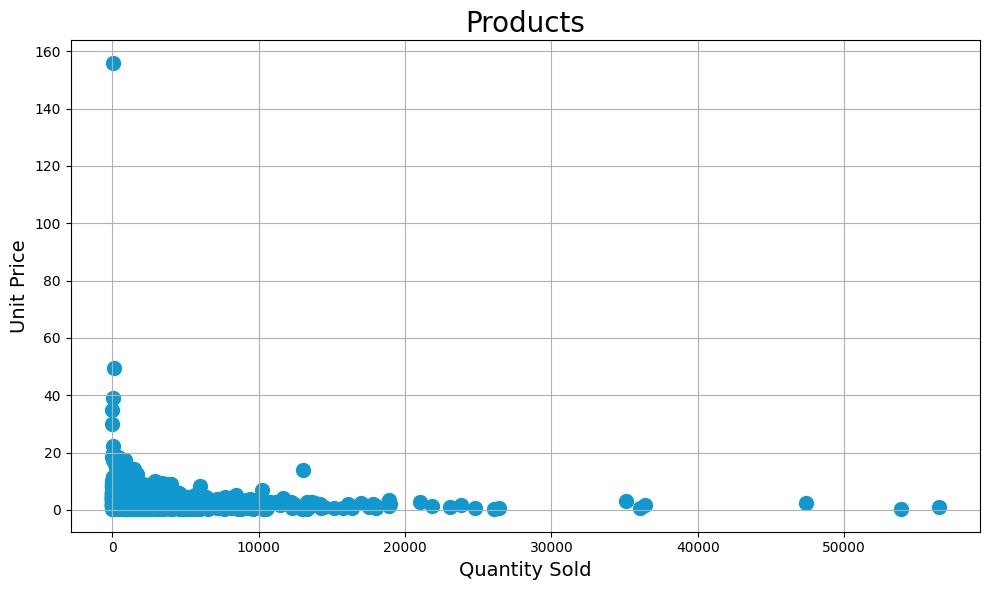

In [702]:
import matplotlib.pyplot as plt
import mplcursors

plt.figure(figsize=(10, 6))
scatter = plt.scatter(products["Quantity"], products["UnitPrice"], s=100, c="#1199cf", label="Products")
plt.title("Products", fontsize=20)
plt.xlabel("Quantity Sold", fontsize=14)
plt.ylabel("Unit Price", fontsize=14)
plt.grid(True)
plt.tight_layout()

def hover(sel):
    if sel.target.index is not None:
        sel.annotation.set_text(products["Description"][sel.target.index])

mplcursors.cursor(hover=True).connect("add", hover)

plt.show()


he x-axis shows the customer's first purchase amount in dollars. They x is shows the customer life time value in dollars. Customer lifetime value is a metric that estimates the total revenue a customer will generate over their relationship with the business.

There appears to be a positive correlation between a customer's first purchase amount and their customer lifetime value. This means that customers who spend more money on their first purchase tend to also spend more money overall with the business. However, the scatter plot shows a significant amount of variability. There are many customers who made a large first purchase but have a low customer lifetime value, and vice versa.

#Customers Contributed the Most to Total Sales



In [703]:
cust_purchases = \
data.groupby("CustomerID") \
.agg({"InvoiceNo": "nunique", "ItemTotal": "sum"}) \
.rename({"ItemTotal":"TotalPurchases","InvoiceNo":"Number_of_Orders"},axis = 1) \
.sort_values(by = "TotalPurchases", ascending = False)

cust_purchases.head(15)

,Number_of_Orders,TotalPurchases
CustomerID,,
14646.0,61,176010.96
18102.0,53,137154.89
17450.0,45,129864.88
14911.0,234,80596.82
14156.0,58,72979.19
12415.0,18,65171.74
17511.0,45,52472.27
14096.0,18,49103.76
15311.0,116,48439.88


**We can determine the contribution of each customer to the total sales figure as a percentage. This calculation involves dividing each customer's sales by the total sales and expressing it as a percentage. This analysis helps identify the proportion of sales contributed by each customer.**

In [704]:
cust_purchases["Percent_of_TotalSales"] = (cust_purchases["TotalPurchases"]/data["ItemTotal"].sum()).map("{:.2%}".format)
cust_purchases["TotalPurchases"] = cust_purchases["TotalPurchases"].map("£{:,.0f}".format)

cust_purchases.head(15)

,Number_of_Orders,TotalPurchases,Percent_of_TotalSales
CustomerID,,,
14646.0,61,"£176,011",2.72%
18102.0,53,"£137,155",2.12%
17450.0,45,"£129,865",2.00%
14911.0,234,"£80,597",1.24%
14156.0,58,"£72,979",1.13%
12415.0,18,"£65,172",1.01%
17511.0,45,"£52,472",0.81%
14096.0,18,"£49,104",0.76%
15311.0,116,"£48,440",0.75%


##Thank you for taking the time to review my notebook!##